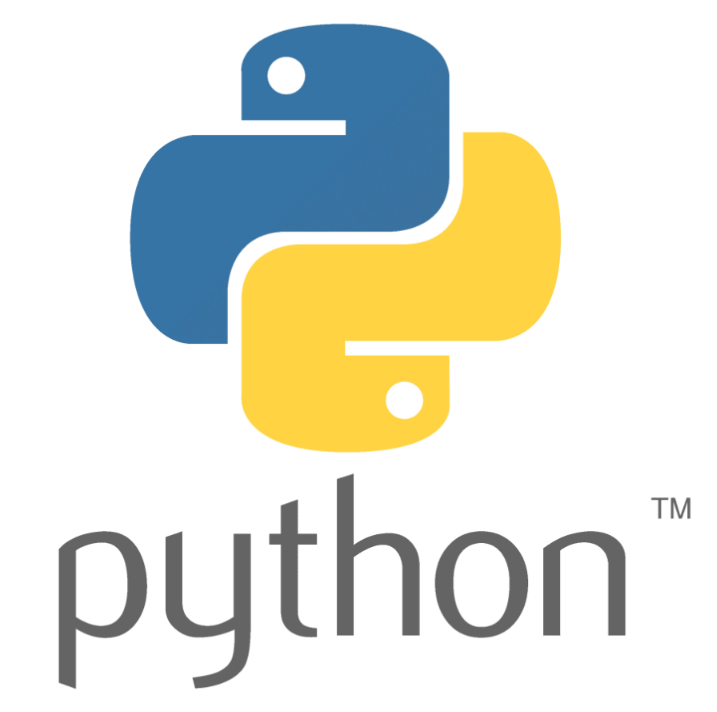


<h3 style="text-align: center;"><b>Семинар №13 ФЭФМ МФТИ</b></h3>

# Контест

## Task1

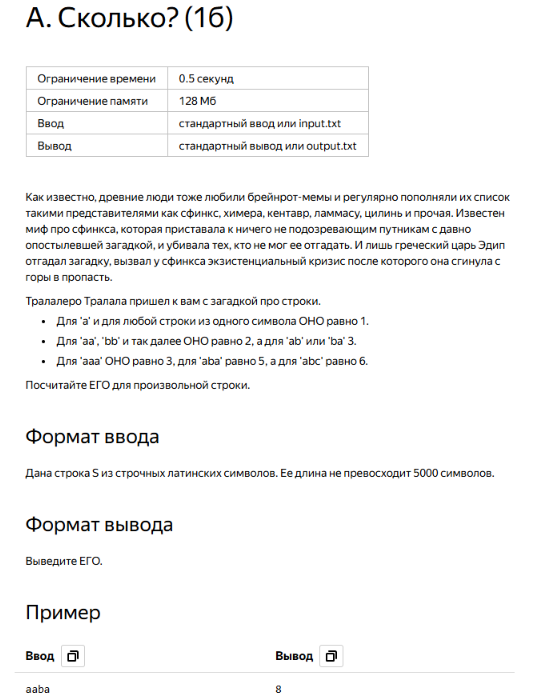

Для 'aaba':

Список уникальных подстрок: 'a', 'b', 'aa', 'ab', 'ba', 'aab', 'aba', 'aaba'  8штук

http://www.e-maxx-ru.1gb.ru/algo/suffix_array

Пусть дана строка S длины n. Суффиксный массив (suffix array, SA) — это массив длины  n, содержащий перестановку индексов от 0 до n−1, которая указывает, в каком порядке суффиксы строки S следуют при сортировке по лексикографическому порядку.

SA[i] — позиция начала i-го по порядку суффикса.

строка banana

In [ ]:
def task1(s):
    n = len(s)
    pr = [s[i:] for i in range(n)]
    pr.sort()
    return pr

s = input()
print(task1(s))

['ananaz', 'anaz', 'az', 'bananaz', 'nanaz', 'naz', 'z']


SA=[5,3,1,0,4,2]

Массив LCP (Longest Common Prefix) хранит длины наибольших общих префиксов между соседними суффиксами в отсортированном массиве.

Для i>0, LCP[i] — длина общего префикса между S[SA[i]] и S[SA[i−1]]

LCP[1] = 1 (a/ana)

LCP[2] = 3 (ana/anana)

LCP[3] = 0 (anana/banana)

LCP[4] = 0 (banana/na)

LCP[5] = 2 (na/nana)

Любую подстроку строки можно представить как префикс одного из её суффиксов. Например, в строке banana, подстрока ban — префикс суффикса banana, подстрока ana — префикс суффикса ana

Если суффикс начинается с позиции SA[i], то длина суффикса n−SA[i]. Это и есть количество всех префиксов этого суффикса, то есть потенциальных уникальных подстрок

Пример: суффикс anana длины 5 даёт 5 подстрок:

a, an, ana, anan, anana

Но часть этих подстрок уже были в предыдущем суффиксе
Поэтому нам нужно исключить повторы для этого и нужен  массив LCP

ЕЩЕ РАЗОК!

если мы рассмотрим два соседних суффикса и они имеют общий префикс длины k, то все подстроки, которые начинаются с позиции i и имеют длину не более k, уже учтены в суффиксе i+1 

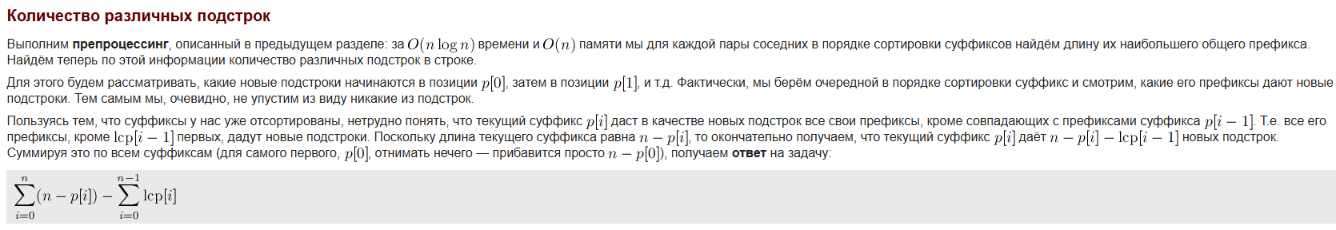

(n−SA[i]) — общее число подстрок, начинающихся с позиции SA[i]

LCP[i] — число повторяющихся подстрок между суффиксами 
SA[i] и SA[i−1]

In [9]:
def task1(s):
    n = len(s)
    pr = [s[i:] for i in range(n)]
    pr.sort()

    def pr_len(i, i_1):
        min_len = min(len(i), len(i_1))
        for j in range(min_len):
            if i[j] != i_1[j]:
                return j
        return min_len

    answer = len(pr[0])
    print(pr)
    for i in range(1, n):
        i_i_1_pr_len = pr_len(pr[i], pr[i - 1])
        answer += len(pr[i]) - i_i_1_pr_len
    return answer

s = input()
print(task1(s))

['ananaz', 'anaz', 'az', 'bananaz', 'nanaz', 'naz', 'z']
22


## Task 6

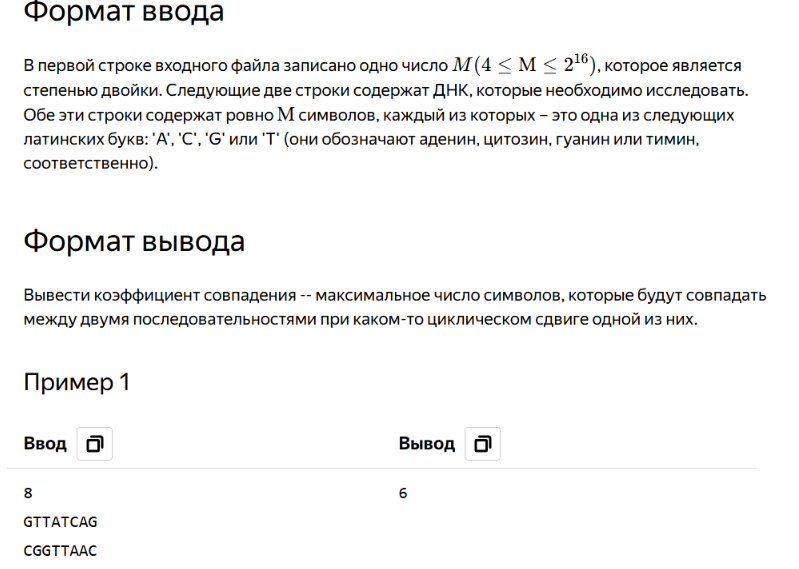

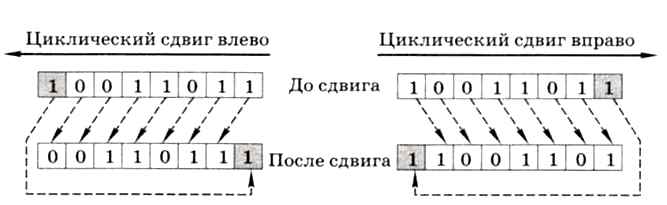

In [37]:
m = int(input())
dna1 = input()
dna2 = input()
max_match = 0

for shift in range(m):
    shift_dna2 = dna2[shift:] + dna2[:shift]
    match = sum(1 for i in range(m) if dna1[i] == shift_dna2[i])
    max_match = max(max_match, match)
print(max_match)

 8
 ПЕЕФЕСФП
 СППЕЕФФС


6


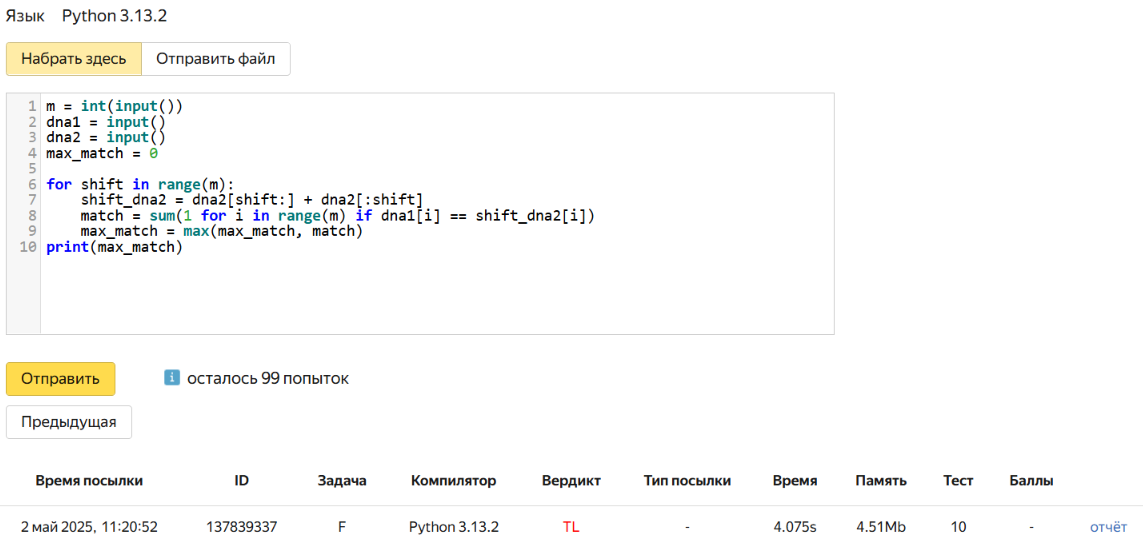

## Convolve

Свёртка используется для выделения, подавления или изменения определённых особенностей сигнала или изображения. Она лежит в основе:

Сглаживания 

Выделения границ 

Анализа сигналов 

In [108]:
import numpy as np

x = np.array([1, 2, 3, 4])        
h = np.array([1, 0.5])     

y = np.convolve(x, h)

print("x:", x)
print("h:", h)
print("y (свёртка):", y)

x: [1 2 3 4]
h: [1.  0.5]
y (свёртка): [1.  2.5 4.  5.5 2. ]


скользящее умножение x на перевёрнутый h и суммирует результат. Размер итогового массива:

len(x)+len(h)−1=3+3−1=5

## FFT

Свёртка, конволюция — операция в функциональном анализе, которая при применении к двум функциям. и. возвращает третью функцию, соответствующую взаимнокорреляционной функции

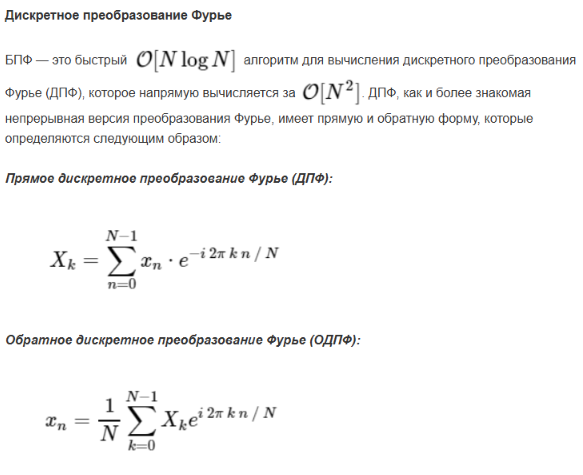

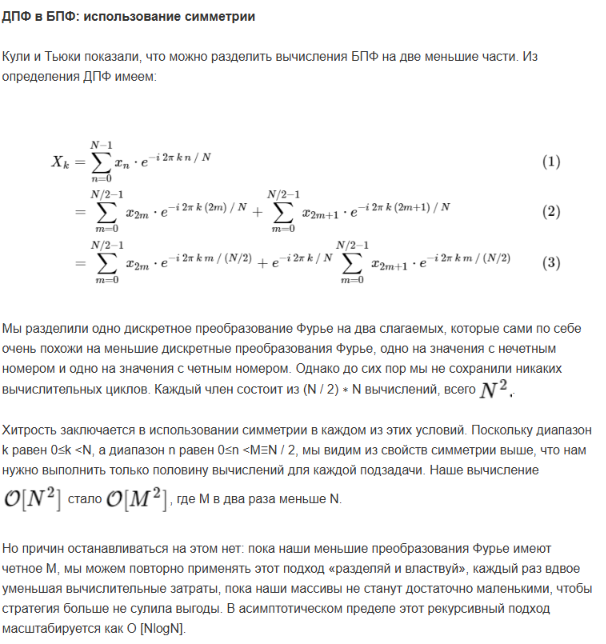

На каждом уровне рекурсии мы делим массив пополам, пока не останется по 1 элементу. Чтобы это деление без остатка работало на каждом шаге, размер массива должен быть кратен 2

В Python Быстрое Преобразование Фурье (FFT) реализуется с помощью библиотеки NumPy — функции np.fft.fft() и np.fft.ifft()

In [53]:
import numpy as np

# исходный сигнал (длина должна быть степенью двойки (обратите внимание на длину строк в задачке ф)), но NumPy работает и с произвольной длиной)
x = np.array([1, 2, 3, 4], dtype=float)

# Прямое БПФ
X = np.fft.fft(x)

# Обратное БПФ
x_reconstructed = np.fft.ifft(X)

print("FFT:", X,  X.real)
print("Обратное FFT:", x_reconstructed, x_reconstructed.real)  

FFT: [10.+0.j -2.+2.j -2.+0.j -2.-2.j] [10. -2. -2. -2.]
Обратное FFT: [1.+0.j 2.+0.j 3.+0.j 4.+0.j] [1. 2. 3. 4.]


In [61]:
import cmath  # для работы с комплексными числами

def fft(x):
    n = len(x)
    if n == 1:
        return x
    if n % 2 != 0:
        raise ValueError("Длина должна быть степенью двойки")

    # Разделим вход на чётные и нечётные
    even = fft(x[0::2])
    odd = fft(x[1::2])

    result = [0] * n
    for k in range(n // 2):
        twiddle = cmath.exp(-2j * cmath.pi * k / n) * odd[k]  # корень из единицы
        result[k] = even[k] + twiddle
        result[k + n // 2] = even[k] - twiddle
    return result

In [65]:
def ifft(X):
    n = len(X)
    X_conj = [x.conjugate() for x in X]
    y = fft(X_conj)
    return [v.conjugate() / n for v in y]

In [67]:
signal = [1, 2, 3, 4] 

X = fft(signal)
reconstructed = ifft(X)

print("FFT:", X)
print("IFFT:", reconstructed)

FFT: [(10+0j), (-2+2j), (-2+0j), (-1.9999999999999998-2j)]
IFFT: [(1-0j), (2+5.721188726109833e-18j), (3+0j), (4-5.721188726109833e-18j)]


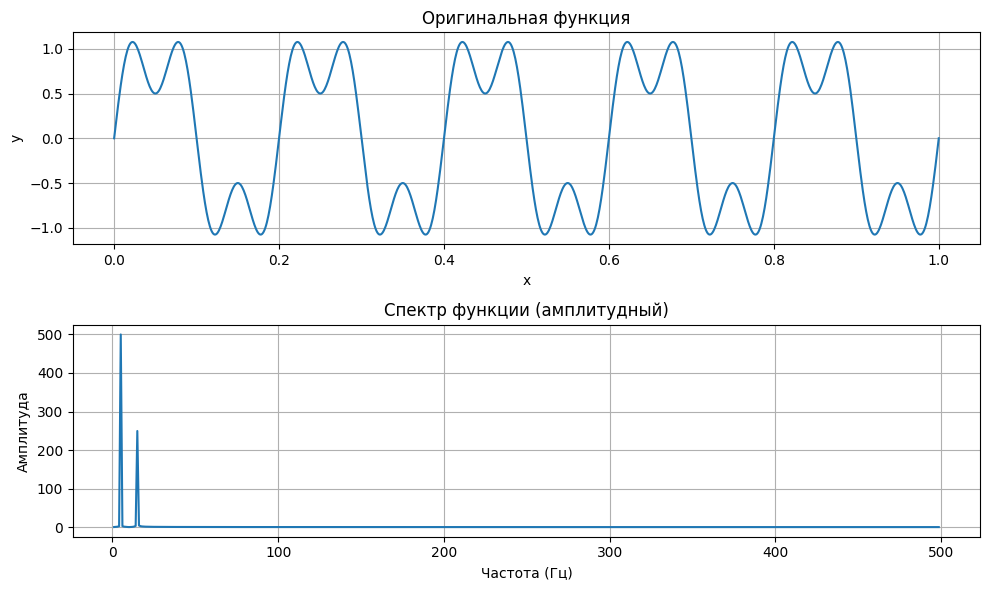

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(2 * np.pi * 5 * x) + 0.5 * np.sin(2 * np.pi * 15 * x)

# Генерация массива x
x = np.linspace(0, 1, 1000)

# Вычисление функции
y = f(x)

# Быстрое Фурье-преобразование
Y = np.fft.fft(y) #/ len(y)  # нормировка
freq = np.fft.fftfreq(len(x), d=x[1] - x[0])

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title("Оригинальная функция")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.subplot(2, 1, 2)
pos_mask = freq > 0
plt.plot(freq[pos_mask], np.abs(Y[pos_mask]))
plt.title("Спектр функции (амплитудный)")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()

plt.tight_layout()
plt.show()

ifft(fft(x) * fft(h))

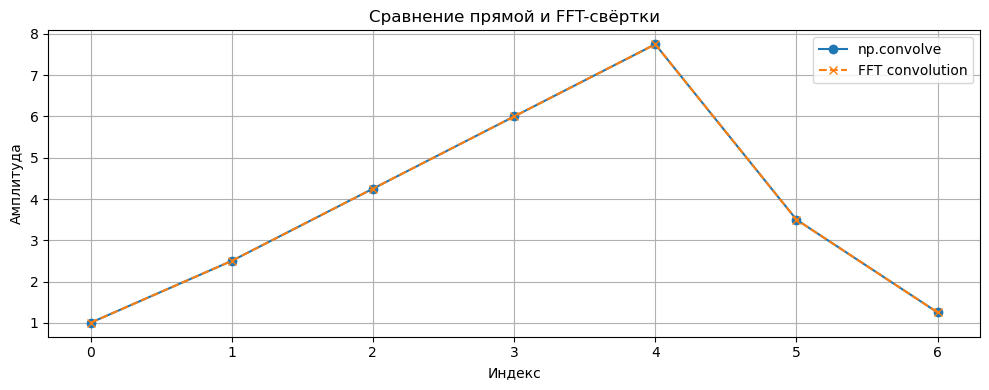

In [87]:
#входной и импульсная характеристика
x = np.array([1, 2, 3, 4, 5])             
h = np.array([1, 0.5, 0.25])              

# вычисляем длину, нужную для свёртки через FFT
n = len(x) + len(h) - 1

# прямое вычисление свёртки (для сравнения)
y_direct = np.convolve(x, h)

# FFT-based свёртка
X = np.fft.fft(x, n)
H = np.fft.fft(h, n)
Y = X * H
y_fft = np.fft.ifft(Y).real  # Обратно во временную область и берём только вещественную часть

plt.figure(figsize=(10, 4))
plt.plot(y_direct, label='np.convolve', marker='o')
plt.plot(y_fft, label='FFT convolution', linestyle='--', marker='x')
plt.title("Сравнение прямой и FFT-свёртки")
plt.xlabel("Индекс")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [89]:
print("Сигнал x:")
print(x)

print("\nИмпульсная характеристика h:")
print(h)

print(f"\nFFT(x) (длина {n}):")
print(np.round(X, 3))

print(f"\nFFT(h) (длина {n}):")
print(np.round(H, 3))

print("\nПроизведение в частотной области (FFT(x) * FFT(h)):")
print(np.round(Y, 3))

print("\nОбратное FFT (ifft) результата:")
print(np.round(y_fft, 3))

print("\nСвёртка через np.convolve:")
print(np.round(y_direct, 3))

Сигнал x:
[1 2 3 4 5]

Импульсная характеристика h:
[1.   0.5  0.25]

FFT(x) (длина 7):
[15.   +0.j    -6.529-4.055j  3.463-1.43j  -0.934+2.453j -0.934-2.453j
  3.463+1.43j  -6.529+4.055j]

FFT(h) (длина 7):
[1.75 +0.j    1.256-0.635j 0.663-0.379j 0.705-0.021j 0.705+0.021j
 0.663+0.379j 1.256+0.635j]

Произведение в частотной области (FFT(x) * FFT(h)):
[ 26.25 +0.j    -10.775-0.949j   1.756-2.261j  -0.606+1.75j
  -0.606-1.75j    1.756+2.261j -10.775+0.949j]

Обратное FFT (ifft) результата:
[1.   2.5  4.25 6.   7.75 3.5  1.25]

Свёртка через np.convolve:
[1.   2.5  4.25 6.   7.75 3.5  1.25]


FFT можно использовать для поиска подстроки (шаблона) в строке с разрешёнными ошибками, например, с одной заменой
    

Заменим символы на числа

Преобразуем строку и шаблон в числовые вектора

Используем FFT для подсчёта совпадений

['a', 'b', 'c', 'd']
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[0 1 0 1]
[0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]
[0 0 1 0]
[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[1 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 4 0 2 0 3 0 2 0 4 0 2 0 3 0 1]


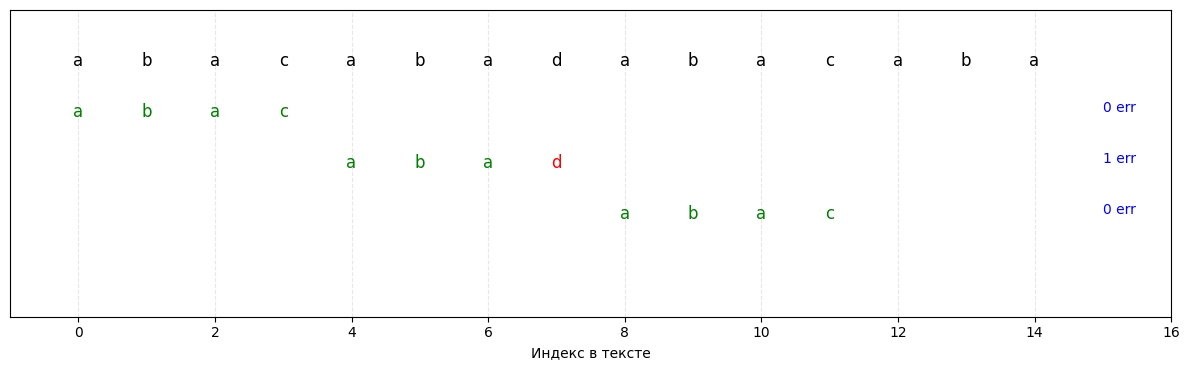

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def fft_convolve(a, b):
    # Находим наименьший размер, достаточный для свёртки без потери данных
    size = 1 << (len(a) + len(b) - 1).bit_length()
    
    # Выполняем быстрое преобразование Фурье для обоих векторов
    fa = np.fft.fft(a, size)
    fb = np.fft.fft(b, size)

    # Перемножаем в частотной области и возвращаем обратно в обычную (обратное Фурье)
    return np.fft.ifft(fa * fb).real.round().astype(int)


def find_matches_with_errors(text, pattern, max_errors=1):
    n, m = len(text), len(pattern)
    size = n + m - 1

    # Инициализируем массив для хранения суммы совпадений по всем символам алфавита
    total_matches = np.zeros(size, dtype=int)

    # Строим алфавит из символов, встречающихся в тексте и шаблоне
    alphabet = sorted(set(text + pattern))
    print(alphabet)
    for i in alphabet:
        # Кодируем позиции символа i в тексте (1 — если символ на позиции равен i, иначе 0)
        A = np.array([1 if ch == i else 0 for ch in text])
        print(A)
        # То же самое для шаблона, но в обратном порядке (для корректной свёртки)
        B = np.array([1 if ch == i else 0 for ch in pattern[::-1]])
        print(B)
        # Вычисляем свёртку для текущего символа
        conv = fft_convolve(A, B)
        print(conv)
        # Добавляем результат к общему количеству совпадений по символам
        total_matches += conv[:size]
    print(total_matches)
    matches = []

    # Проверяем каждую возможную позицию вхождения шаблона в текст
    for i in range(n - m + 1):
        match_count = total_matches[i + m - 1]  # количество совпавших символов на позиции i
        errors = m - match_count                # количество несовпавших символов (ошибок)
        
        # Добавляем позицию, если число ошибок не превышает допустимое
        if errors <= max_errors:
            matches.append((i, errors))

    return matches



def visualize_matches(text, pattern, matches):
    n, m = len(text), len(pattern)
    fig, ax = plt.subplots(figsize=(12, len(matches) * 0.6 + 2))
    ax.set_xlabel("Индекс в тексте")
    ax.set_xlim(-1, n + 1)
    ax.set_ylim(-1, len(matches) + 2)
    for i, ch in enumerate(text):
        ax.text(i, len(matches)+1, ch, ha='center', va='center', fontsize=12, color="black")
    for row, (start, errors) in enumerate(matches):
        for i in range(m):
            color = "green" if text[start + i] == pattern[i] else "red"
            ax.text(start + i, len(matches) - row, text[start + i], ha='center', va='center', fontsize=12, color=color)
        ax.text(n, len(matches) - row, f"{errors} err", fontsize=10, color="blue")
    ax.set_yticks([])
    ax.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

text = "abacabadabacaba"
pattern = "abac"
matches = find_matches_with_errors(text, pattern, max_errors=1)
visualize_matches(text, pattern, matches)